Первые 5 строк данных:


Row,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Int64,Int64,Float64,Float64,Float64,Float64
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2



Основная статистика данных:


Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,crim,3.61352,0.00632,0.25651,88.9762,0,Float64
2,zn,11.3636,0.0,0.0,100.0,0,Float64
3,indus,11.1368,0.46,9.69,27.74,0,Float64
4,chas,0.06917,0,0.0,1,0,Int64
5,nox,0.554695,0.385,0.538,0.871,0,Float64
6,rm,6.28463,3.561,6.2085,8.78,0,Float64
7,age,68.5749,2.9,77.5,100.0,0,Float64
8,dis,3.79504,1.1296,3.20745,12.1265,0,Float64
9,rad,9.54941,1,5.0,24,0,Int64



Размерность данных: (506, 14)


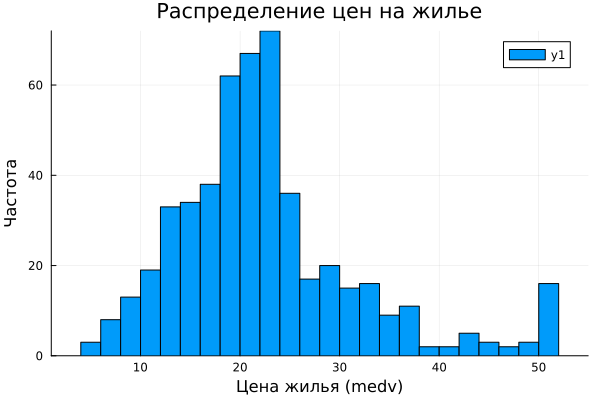

In [4]:
using CSV
using DataFrames
using Statistics
using GLM
using Random
using Plots

# Загрузка датасета Boston Housing
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = CSV.read(download(url), DataFrame)

# Исследовательский анализ данных
println("Первые 5 строк данных:")
display(first(df, 5))

println("\nОсновная статистика данных:")
display(describe(df))

println("\nРазмерность данных: ", size(df))


# Визуализация распределения целевой переменной
histogram(df.medv, xlabel="Цена жилья (medv)", ylabel="Частота", title="Распределение цен на жилье")


Коэффициенты модели:
(Intercept)  = 28.0018
crim         = -0.101
zn           = 0.0431
indus        = 0.0468
chas         = 1.687
nox          = -14.6268
rm           = 4.4579
age          = 0.0014
dis          = -1.1982
rad          = 0.3197
tax          = -0.0143
ptratio      = -0.9081
b            = 0.0103
lstat        = -0.4597

Оценка модели на тестовой выборке:
Среднеквадратичная ошибка (MSE): 34.68
Среднеквадратичная ошибка (RMSE): 5.89
Средняя абсолютная ошибка (MAE): 3.69
Коэффициент детерминации (R²): 0.67


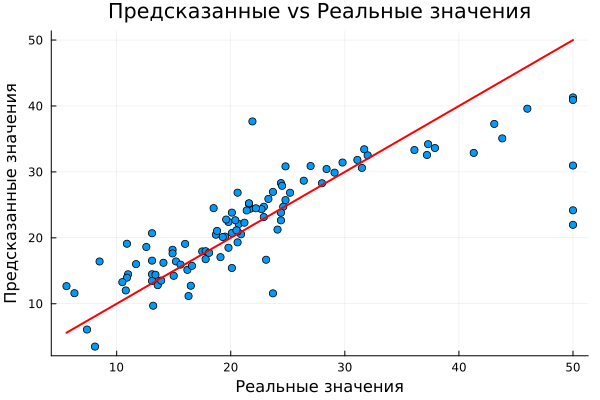

In [ ]:
# Разделение данных на обучающую и тестовую выборки
Random.seed!(123) # для воспроизводимости
n = nrow(df) # количество строк
shuffled = shuffle(1:n) # перемешивание индексов
train_size = Int(round(0.8 * n)) # 80% для обучения
train_idx = shuffled[1:train_size] # индексы для обучения
test_idx = shuffled[train_size+1:end] # индексы для теста

# Разделение DataFrame на обучающую и тестовую выборки
train_df = df[train_idx, :]
test_df = df[test_idx, :]

# Построение модели линейной регрессии со всеми признаками
formula = @formula(medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + b + lstat) 
model = lm(formula, train_df) 

# Вывод коэффициентов модели
println("\nКоэффициенты модели:")
ct = coeftable(model)
for (name, coef) in zip(coefnames(model), coef(model)) # перебор имен признаков и их коэффициентов
    println(rpad(name, 12), " = ", round(coef, digits=4))
end

# Прогнозирование и оценка модели
y_true = test_df.medv
y_pred = predict(model, test_df)

# Различные метрики оценки
mse = mean((y_true .- y_pred).^2) # среднеквадратичная ошибка
rmse = sqrt(mse) # корень из среднеквадратичной ошибки
mae = mean(abs.(y_true .- y_pred)) # средняя абсолютная ошибка
r2 = 1 - sum((y_true .- y_pred).^2) / sum((y_true .- mean(y_true)).^2) # коэффициент детерминации

println("\nОценка модели на тестовой выборке:")
println("Среднеквадратичная ошибка (MSE): ", round(mse, digits=2))
println("Среднеквадратичная ошибка (RMSE): ", round(rmse, digits=2))
println("Средняя абсолютная ошибка (MAE): ", round(mae, digits=2))
println("Коэффициент детерминации (R²): ", round(r2, digits=2))

# Визуализация предсказаний vs реальных значений
scatter(y_true, y_pred, xlabel="Реальные значения", ylabel="Предсказанные значения", 
        title="Предсказанные vs Реальные значения", legend=false)
plot!(LinRange(minimum(y_true), maximum(y_true), 100), 
      LinRange(minimum(y_true), maximum(y_true), 100), 
      linewidth=2, linecolor=:red)

# Проект: Прогнозирование цен на недвижимость с помощью линейной регрессии
## 1. Подключение библиотек
``` Julia
using CSV
using DataFrames
using Statistics
using GLM
using Random
using Plots
```

- CSV — для чтения CSV-файлов.
- DataFrames — удобная работа с таблицами.
- Statistics — базовые статистические функции.
- GLM — построение моделей обобщённых линейных моделей (в т.ч. линейная регрессия).
- Random — работа со случайными числами (перемешивание, генерация).
- Plots — визуализация данных.

## 2. Загрузка и предварительный анализ данных
``` Julia
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = CSV.read(download(url), DataFrame)
```

Загружается классический набор данных Boston Housing, содержащий характеристики домов (площадь, количество комнат, налог, криминогенность района и т.д.), а также целевую переменную medv — цену жилья.

### Просмотр данных
``` Julia
println("Первые 5 строк данных:")
display(first(df, 5))

println("\nОсновная статистика данных:")
display(describe(df))

println("\nРазмерность данных: ", size(df))
```

- first(df, 5) — первые 5 строк.
- describe(df) — основные статистики по признакам (среднее, min, max, дисперсия и т.д.).
- size(df) — количество строк и столбцов.

## 3. Визуализация целевой переменной
``` Julia
histogram(df.medv, xlabel="Цена жилья (medv)", ylabel="Частота", 
          title="Распределение цен на жилье")
```

Гистограмма распределения цен на жильё. Обычно видно, что цены имеют асимметричное распределение, с ограничением сверху (в классическом датасете максимум medv = 50).

## 4. Разделение данных на обучающую и тестовую выборки
``` Julia
Random.seed!(123) # фиксируем случайность
n = nrow(df)
shuffled = shuffle(1:n) 
train_size = Int(round(0.8 * n)) # 80% обучение, 20% тест
train_idx = shuffled[1:train_size]
test_idx = shuffled[train_size+1:end]

train_df = df[train_idx, :]
test_df = df[test_idx, :]
```

- Данные перемешиваются.
- 80% — обучение, 20% — тест.
- Таким образом проверяется, насколько модель обобщает информацию.

## 5. Построение модели линейной регрессии
``` Julia
formula = @formula(medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + b + lstat) 
model = lm(formula, train_df) 
```

- @formula — задаём зависимость: цена (medv) зависит от всех признаков.
- lm — строит модель линейной регрессии.

### Коэффициенты модели
``` Julia
ct = coeftable(model)
for (name, coef) in zip(coefnames(model), coef(model))
    println(rpad(name, 12), " = ", round(coef, digits=4))
end
```

Выводятся коэффициенты признаков: насколько увеличивается/уменьшается цена при изменении признака на единицу (при прочих равных).

## 6. Прогнозирование и оценка качества модели
``` Julia
y_true = test_df.medv
y_pred = predict(model, test_df)
```

- y_true — реальные цены.
- y_pred — предсказанные моделью.

### Метрики
``` Julia
mse = mean((y_true .- y_pred).^2) # MSE
rmse = sqrt(mse)                  # RMSE
mae = mean(abs.(y_true .- y_pred)) # MAE
r2 = 1 - sum((y_true .- y_pred).^2) / sum((y_true .- mean(y_true)).^2) # R²
```

- MSE (среднеквадратичная ошибка) — насколько в среднем предсказания отклоняются от реальных значений в квадрате.
- RMSE — то же самое, но в тех же единицах, что и medv (цены).
- MAE — средняя абсолютная ошибка.
- R² (коэффициент детерминации) — показывает, какая доля дисперсии объясняется моделью (от 0 до 1, чем выше — тем лучше).

## 7. Визуализация результатов
``` Julia
scatter(y_true, y_pred, xlabel="Реальные значения", ylabel="Предсказанные значения", 
        title="Предсказанные vs Реальные значения", legend=false)

plot!(LinRange(minimum(y_true), maximum(y_true), 100), 
      LinRange(minimum(y_true), maximum(y_true), 100), 
      linewidth=2, linecolor=:red)
```

- Точки: реальные цены vs предсказанные.
- Красная линия: идеальное предсказание (y = x).
- Чем ближе точки к линии — тем точнее модель.

В итоге проект демонстрирует полный цикл: загрузка данных → анализ → построение модели → оценка качества → визуализация результатов.